### Importing libraries

In [15]:
import sklearn
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### loading dataset

In [16]:
path=("C:\\Users\\catiq\\OneDrive\\Documents\\Downloads\\spam.csv")

df=pd.read_csv(path,encoding="latin-1")[['v1', 'v2']] #getting only first  2 columns

df.columns=['label', 'message'] #renaming columns

#### Exploring dataset

In [17]:
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# stopwords download (sirf first time run karna hoga)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\catiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text preprocessing

In [19]:
# stemmer object
ps = PorterStemmer()

In [20]:
# preprocessing function
def preprocess_text(text):
    # 1. lowercase
    text = text.lower()
    
    # 2. remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. tokenization
    words = text.split()

 # 4. stopwords removal + stemming
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    
    return " ".join(words)


In [21]:
# apply preprocessing function on dataset
df['clean_message'] = df['message'].apply(preprocess_text)


In [22]:
# check results
print(df.head())

  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


#### importing libraries

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### applying Bag of words (BoW) technique

In [24]:
# Bag of Words
cv = CountVectorizer(max_features=3000)   # top 3000 words only

X_bow = cv.fit_transform(df['clean_message']).toarray() #converting words into numerical frequency


In [25]:
print("Bag of Words Shape:", X_bow.shape)  #shape of data


Bag of Words Shape: (5572, 3000)


### Splitting data into train and test

In [26]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
   X_bow , df['label'], test_size=0.2, random_state=42)


### Training model

In [37]:
# 6. Train SVM model
#svm_model = SVC(kernel='linear', C=1,class_weight='balanced')  # linear kernel for text data
#svm_model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'C': 0.1, 'kernel': 'linear'}


### Making predictions

In [39]:
# 7. Predictions
y_pred =grid.predict(X_test)

y_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

In [40]:
y_test

3245     ham
944      ham
1044    spam
2484     ham
812     spam
        ... 
4264     ham
2439     ham
5556     ham
4205     ham
4293    spam
Name: label, Length: 1115, dtype: object

### Model Evaluation

In [41]:
# 8. Evaluation

from sklearn.metrics import accuracy_score, classification_report


print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9829596412556054

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### User input 

In [44]:
# User input
user_msg = input("Enter a message to check if it's spam or not: ")

# preprocess user input
clean_input = preprocess_text(user_msg)

# transform using SAME vectorizer (⚠️ important)
input_bow = cv.transform([clean_input]).toarray()

# predict
prediction = svm_model.predict(input_bow)[0]

# result
if prediction == "spam":
    print("🚨 This message is SPAM")
else:
    print("✅ This message is NOT spam")

Enter a message to check if it's spam or not:  youwon 500k


✅ This message is NOT spam


### Bar plot 

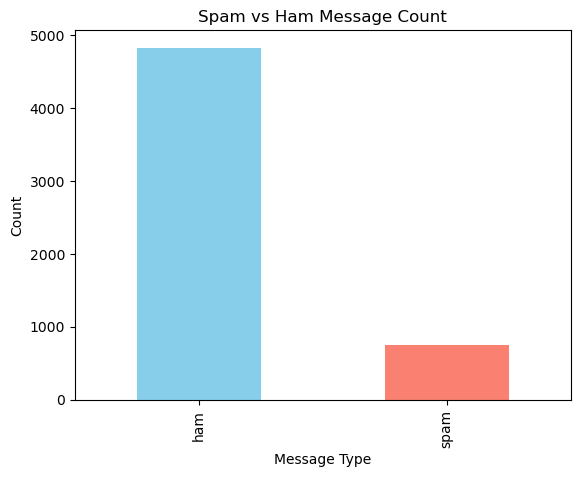

In [48]:
import matplotlib.pyplot as plt

# Class distribution
df['label'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Spam vs Ham Message Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

### Confusion Matirx

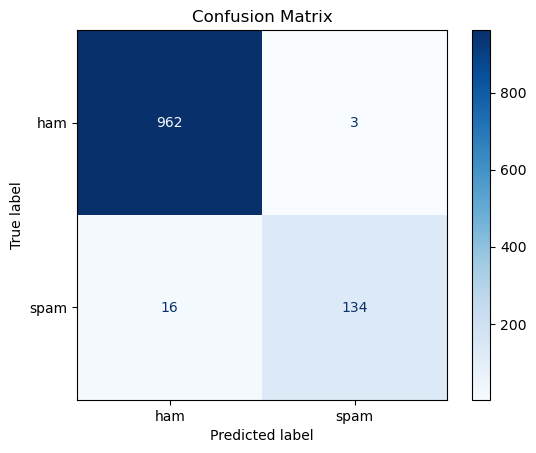

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### 3️⃣ Save Model


In [45]:
import joblib

joblib.dump(grid, 'svm_spam_classifier.pkl')
print("✅ Model saved as 'svm_spam_classifier.pkl'")

# ✅ Optional: Load model in future
# loaded_model = joblib.load('svm_spam_classifier.pkl')
# loaded_model.predict(new_data)

✅ Model saved as 'svm_spam_classifier.pkl'
